# Mitotic Exit Dataset

**Summary** This dataset contains single cell RNAseq paired with 2 fucci measurements and a time for how far into G1 phase each cell is (real time, not pseudo-time)

**Reference**: [Time-resolved single-cell sequencing
identifies multiple waves of mRNA decay
during the mitosis-to-G1 phase transition](https://elifesciences.org/articles/71356)

In [1]:
import os
import sys
import umap
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
import anndata as ad
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
DATAPATH = "/nfs/turbo/umms-indikar/shared/projects/foundation_models/experiments/mitoticExit/"
MODELS   = [
    "tGPT",
    "geneformer",
    "scgpt",
    "raw"
]
ads = {}
for model in MODELS:
    ads[model] = ad.read_h5ad(os.path.join(DATAPATH, model + '.h5ad'))

## Scree Plots

In [ ]:
svs = []
for key, adata in ads.items():
    print(key)
    X = np.nan_to_num(adata.X, nan=0.0)
    _, sigma, _ = np.linalg.svd(X)
    svs.append(sigma)

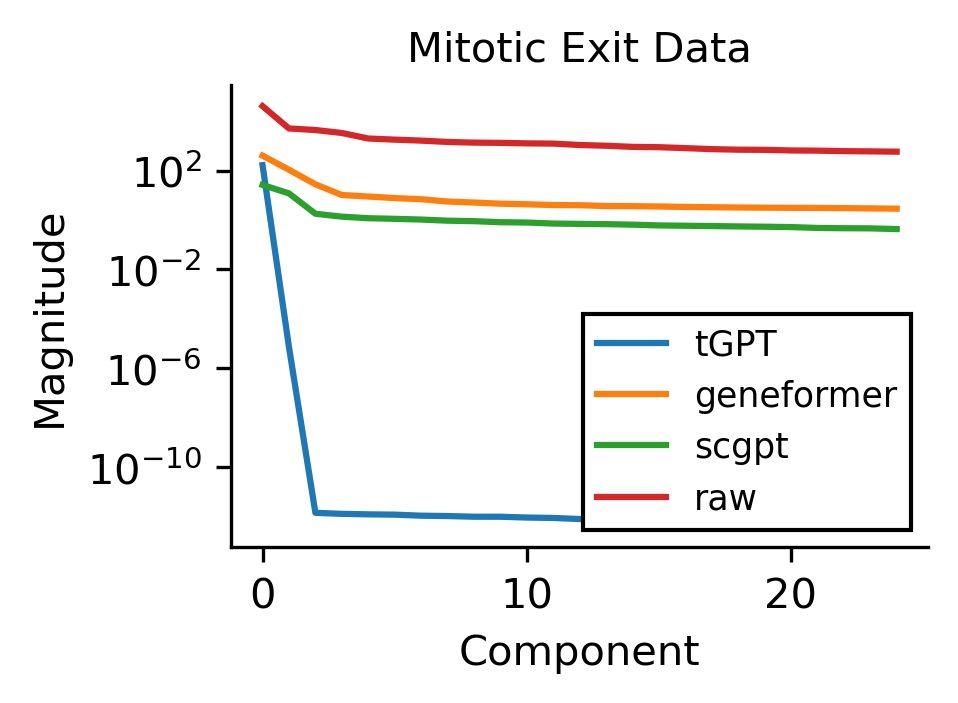

In [22]:
plt.figure(figsize=(3,2), dpi=300)
for i in range(4):
    # n = svs[i] / sum(svs[i])
    n = svs[i]
    plt.plot(n[:25], label=list(ads.keys())[i])
plt.legend(loc='lower right', fontsize='small', fancybox=False, framealpha=1, edgecolor='black')
sns.despine()
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.yscale('log')
plt.title('Mitotic Exit Data', fontsize=10)
plt.show()

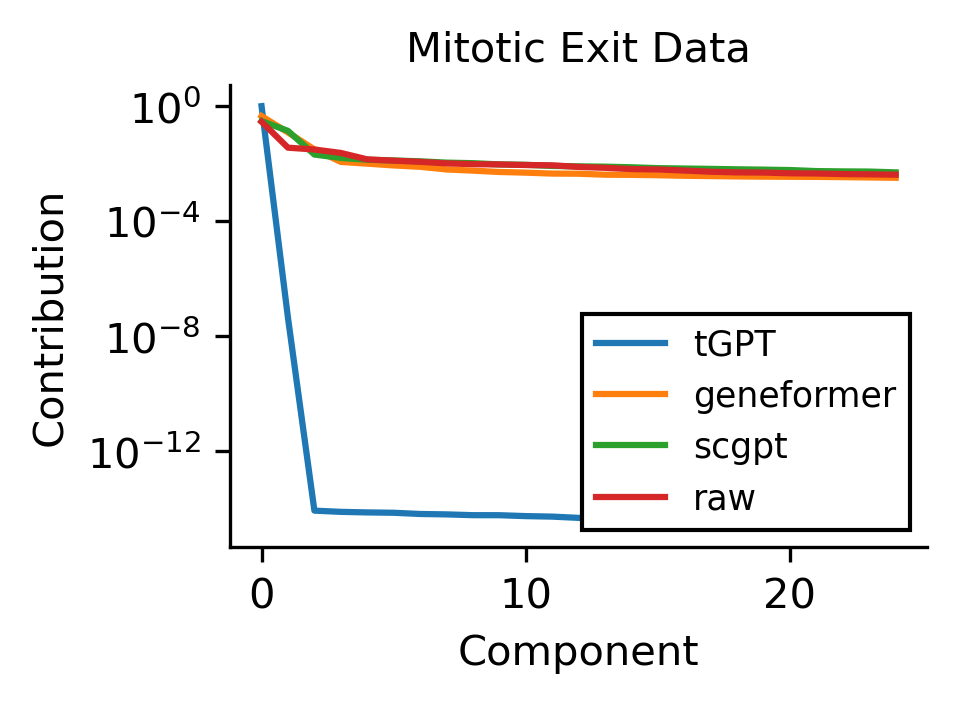

In [23]:
plt.figure(figsize=(3,2), dpi=300)
for i in range(4):
    n = svs[i] / sum(svs[i])
    # n = svs[i]
    plt.plot(n[:25], label=list(ads.keys())[i])
plt.legend(loc='lower right', fontsize='small', fancybox=False, framealpha=1, edgecolor='black')
sns.despine()
plt.xlabel('Component')
plt.ylabel('Contribution')
plt.yscale('log')
plt.title('Mitotic Exit Data', fontsize=10)
plt.show()


## UMAP Plots

In [4]:
ads

{'tGPT': AnnData object with n_obs × n_vars = 841 × 1024
     obs: 'Plate_Id', 'Well_Id', 'Fucci_g1', 'Fucci_g2', 'Cell cycle phase', 'Cell cycle time',
 'geneformer': AnnData object with n_obs × n_vars = 841 × 512
     obs: 'Plate_Id', 'Well_Id', 'Fucci_g1', 'Fucci_g2', 'Cell cycle phase', 'Cell cycle time', 'n_counts',
 'scgpt': AnnData object with n_obs × n_vars = 841 × 512
     obs: 'Plate_Id', 'Well_Id', 'Fucci_g1', 'Fucci_g2', 'Cell cycle phase', 'Cell cycle time',
 'raw': AnnData object with n_obs × n_vars = 841 × 15957
     obs: 'Plate_Id', 'Well_Id', 'Fucci_g1', 'Fucci_g2', 'Cell cycle phase', 'Cell cycle time', 'n_counts'
     var: 'gene_id', 'token_id', 'gene_name', 'nonzero_median', 'gene_version', 'gene_biotype', 'Chromosome', 'Start', 'End', 'scenic_tf', 'ensembl_id', 'ref'}

reducer
embedding
reducer
embedding
reducer
embedding
reducer
embedding


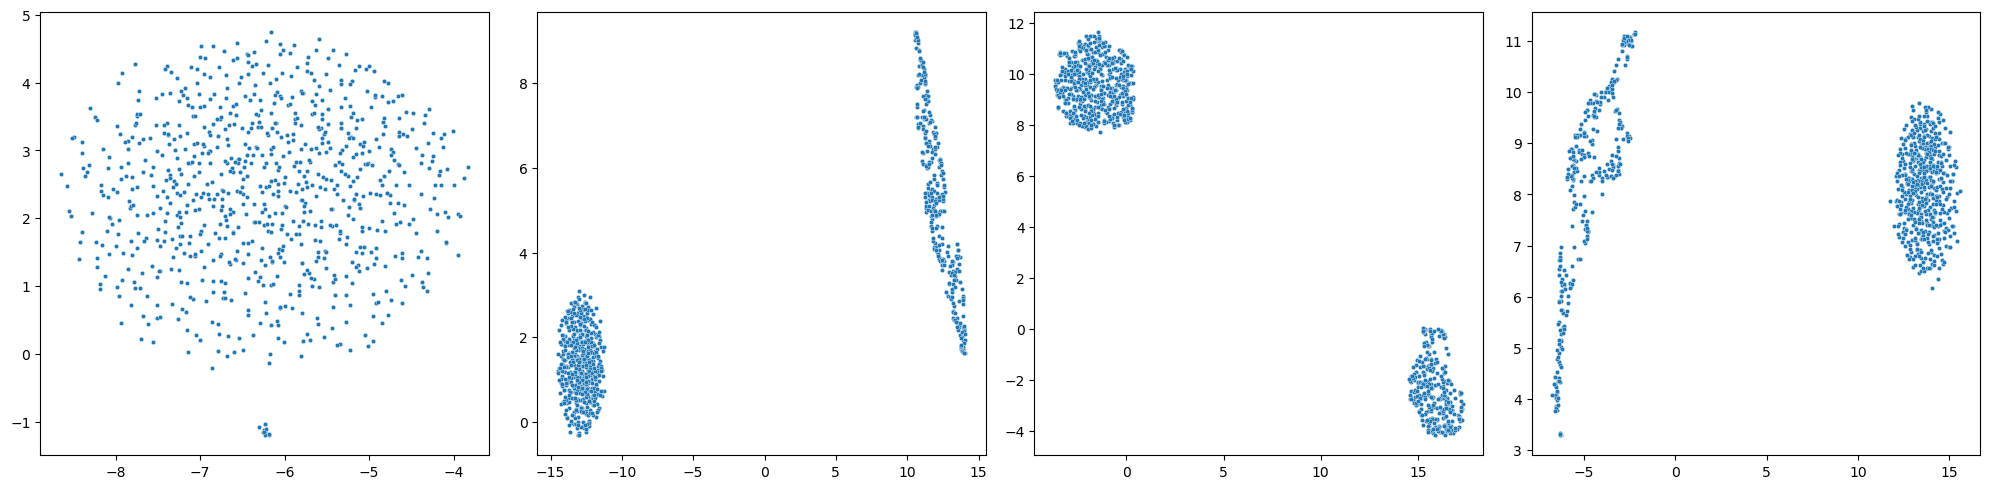

In [15]:
# Number of adata objects
num_adata = len(ads)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_adata, figsize=(5 * num_adata, 5))

# Iterate over the dictionary and create UMAP plots
for ax, (label, adata) in zip(axes, ads.items()):
    # Perform UMAP
    reducer = umap.UMAP()
    print('reducer')
    embedding = reducer.fit_transform(np.nan_to_num(adata.X, nan=0.0))
    print('embedding')
    
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        #hue=adata.obs['cell_type'] if 'cell_type' in adata.obs.columns else None,  # Replace 'cell_type' with a relevant column if needed
        #palette=sns.color_palette("hsv", as_cmap=True),
        ax=ax,
        #legend="full",
        s=10
    )


# Adjust layout and show the plot
plt.tight_layout()
plt.show()
